In [1]:
import numpy as np
import pandas as pda
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [8]:
from preprocess import getdfs, process_strings

def f(x):
    return ' '.join(x)

train_df, valid_df = getdfs('text_seq',1)

train_df['input_str'] = process_strings(train_df['input_str'])
valid_df['input_str'] = process_strings(valid_df['input_str'])

train_df['input_str'] = train_df['input_str'].str.rstrip('0')
train_df['input_str'] = train_df['input_str'].apply(lambda x: f(x))


In [24]:
text_train = train_df['input_str'].values
text_valid = valid_df['input_str'].values
y_train = train_df['label'].values
y_valid = valid_df['label'].values

In [25]:
text_train

array(['2 7 1 8 2 8 0 0 3 1 3 2', '3 6 9 5 1 1 0 4 7 4 7 6 1',
       '5 9 9 9 1 3 5 8 0 4 0 5 1', ..., '3 0 6 9 9 4 3 0 9 1 7 9 5',
       '1 9 8 3 3 7 7 5 8 9 4', '4 7 6 1 1 9 2 3 1 8 9 9'], dtype=object)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(ngram_range=(3, 5), analyzer='char')  # Extract n-grams
# x_train = vectorizer.fit_transform(text_train).toarray()
# x_valid = vectorizer.transform(text_valid).toarray()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer='char')

# Fit and transform the data
x_train = vectorizer.fit_transform(text_train)
x_valid = vectorizer.transform(text_valid)

In [30]:
x_train

<7080x11 sparse matrix of type '<class 'numpy.float64'>'
	with 56923 stored elements in Compressed Sparse Row format>

In [28]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.52      0.67      0.58       252
     Class 1       0.48      0.32      0.39       237

    accuracy                           0.51       489
   macro avg       0.50      0.50      0.49       489
weighted avg       0.50      0.51      0.49       489

Accuracy is 0.5051124744376279
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:53:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.49      0.36      0.42       252
     Class 1       0.47      0.60      0.53       237

    accuracy                           0.48       489
   macro avg       0.48      0.48      0.47       489
weighted avg       0.48      0.48      0.47       489

Accuracy is 0.4785276073619632
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.52      1.00      0.68       252
     Class 1       0.00      0.00      0.00       237

    accuracy                           0.52       489
   macro avg       0.26      0.50      0.34       489
weighted avg       0.27      0.52      0.35       489

Accuracy is 0.5153374233128835
==========Logistic Regression==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Number of parameters in the MLP model:  6301
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.50      0.84      0.63       252
     Class 1       0.37      0.10      0.15       237

    accuracy                           0.48       489
   macro avg       0.43      0.47      0.39       489
weighted avg       0.43      0.48      0.40       489

Accuracy is 0.48057259713701433
==========MLP==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site

==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.52      1.00      0.68       252
     Class 1       0.00      0.00      0.00       237

    accuracy                           0.52       489
   macro avg       0.26      0.50      0.34       489
weighted avg       0.27      0.52      0.35       489

Accuracy is 0.5153374233128835
==========SVC==========


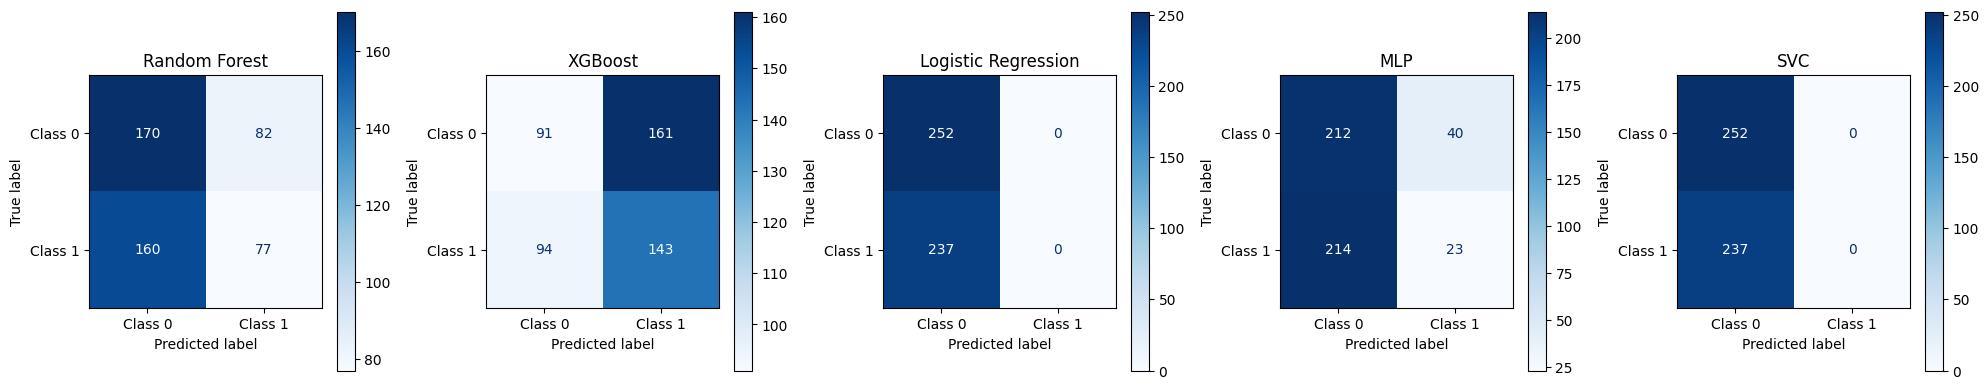

In [29]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()